In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv("flights.csv")


C:\Users\VIDYA MANASA\AppData\Local\Temp\ipykernel_11580\2694568856.py:1: DtypeWarning: Columns (0: ORIGIN_AIRPORT, 1: DESTINATION_AIRPORT) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("flights.csv")


In [3]:
df.head()


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape


(5819079, 31)

In [5]:
df.info()



<class 'pandas.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              str    
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          str    
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24  CANCELLED

In [6]:
df.isnull().sum()


YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [8]:
delay_columns = [
    "AIR_SYSTEM_DELAY",
    "SECURITY_DELAY",
    "AIRLINE_DELAY",
    "LATE_AIRCRAFT_DELAY",
    "WEATHER_DELAY"
]

df[delay_columns] = df[delay_columns].fillna(0)


In [9]:
df[delay_columns].isnull().sum()


AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

In [10]:
total_delay_by_cause = df[delay_columns].sum()

total_delay_by_cause


AIR_SYSTEM_DELAY       14335762.0
SECURITY_DELAY            80985.0
AIRLINE_DELAY          20172956.0
LATE_AIRCRAFT_DELAY    24961931.0
WEATHER_DELAY           3100233.0
dtype: float64

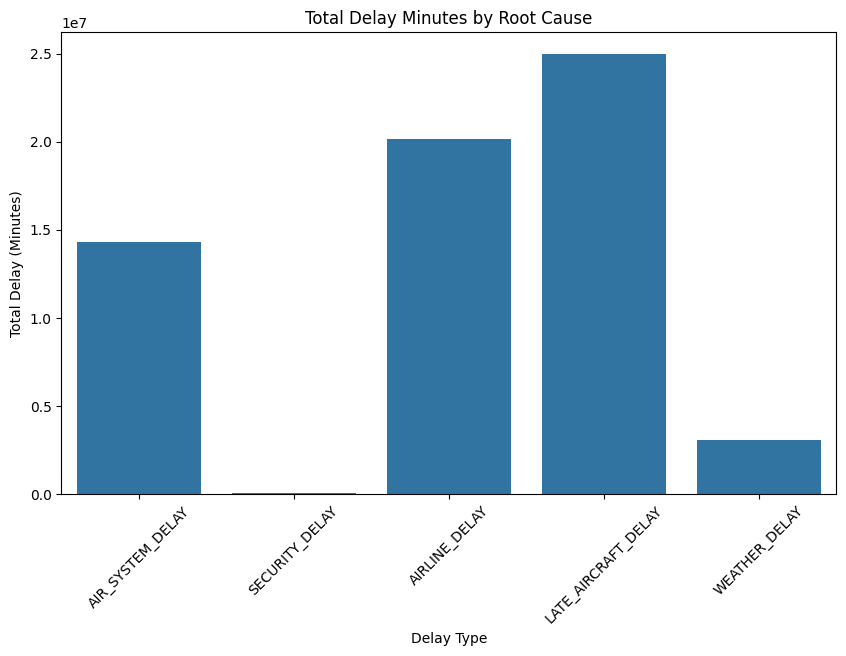

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x=total_delay_by_cause.index, 
            y=total_delay_by_cause.values)

plt.xticks(rotation=45)
plt.title("Total Delay Minutes by Root Cause")
plt.ylabel("Total Delay (Minutes)")
plt.xlabel("Delay Type")

plt.show()


In [12]:
correlation_data = df[
    ["ARRIVAL_DELAY"] + delay_columns
]

corr_matrix = correlation_data.corr()

corr_matrix


,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
ARRIVAL_DELAY,1.000000,0.424414,0.028074,0.627489,0.622980,0.270098
AIR_SYSTEM_DELAY,0.424414,1.000000,0.002914,0.030073,0.055954,0.050382
SECURITY_DELAY,0.028074,0.002914,1.000000,-0.001356,0.003735,-0.000692
AIRLINE_DELAY,0.627489,0.030073,-0.001356,1.000000,0.058261,-0.004615
LATE_AIRCRAFT_DELAY,0.622980,0.055954,0.003735,0.058261,1.000000,0.037042
WEATHER_DELAY,0.270098,0.050382,-0.000692,-0.004615,0.037042,1.000000


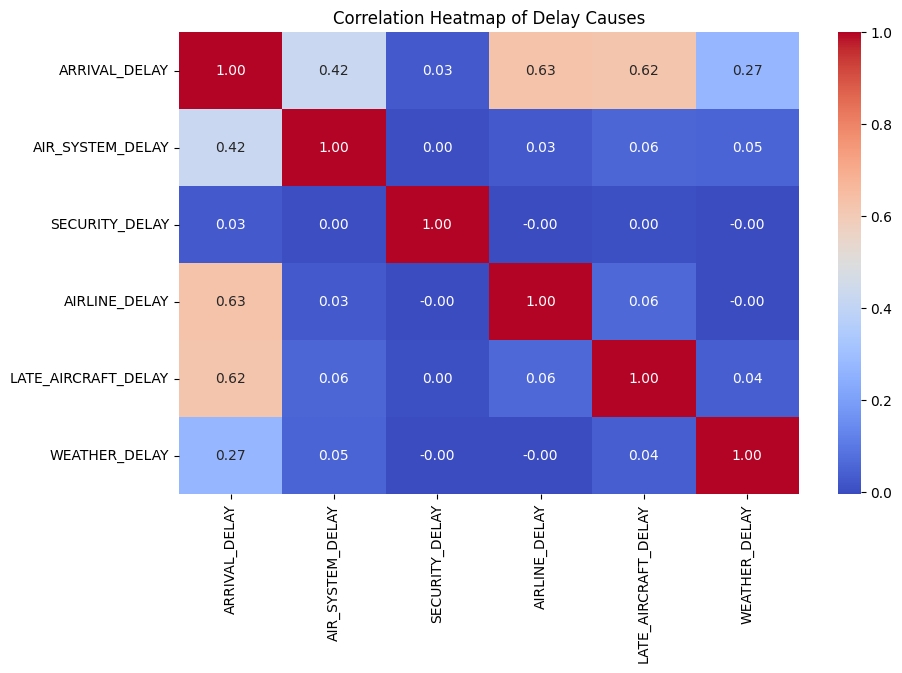

In [13]:
plt.figure(figsize=(10,6))

sns.heatmap(corr_matrix, 
            annot=True, 
            cmap="coolwarm", 
            fmt=".2f")

plt.title("Correlation Heatmap of Delay Causes")
plt.show()


In [14]:
monthly_delay = df.groupby("MONTH")[delay_columns].sum()

monthly_delay


,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
MONTH,,,,,
1,1278055.0,6700.0,1708155.0,2183865.0,263087.0
2,1349173.0,4580.0,1712660.0,2157918.0,411265.0
3,1228893.0,6586.0,1818680.0,2156090.0,228661.0
4,1118027.0,3660.0,1490594.0,1785437.0,221590.0
5,1254652.0,5711.0,1667920.0,2172521.0,336555.0
6,1630868.0,7084.0,2296333.0,3055836.0,380699.0
7,1343455.0,6821.0,2021379.0,2782381.0,232468.0
8,1274603.0,11993.0,1819598.0,2244485.0,265792.0
9,786621.0,5968.0,1176791.0,1185164.0,137043.0


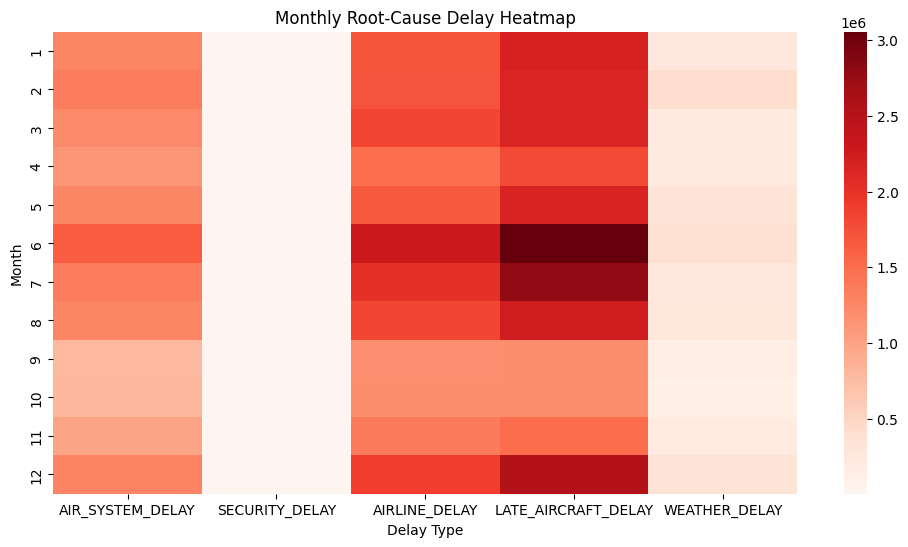

In [15]:
plt.figure(figsize=(12,6))

sns.heatmap(monthly_delay,
            cmap="Reds",
            annot=False)

plt.title("Monthly Root-Cause Delay Heatmap")
plt.ylabel("Month")
plt.xlabel("Delay Type")

plt.show()


In [16]:
flights_per_month = df.groupby("MONTH").size()

flights_per_month


MONTH
1     469968
2     429191
3     504312
4     485151
5     496993
6     503897
7     520718
8     510536
9     464946
10    486165
11    467972
12    479230
dtype: int64

In [17]:
avg_monthly_delay = monthly_delay.div(flights_per_month, axis=0)

avg_monthly_delay


,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
MONTH,,,,,
1,2.719451,0.014256,3.634620,4.646838,0.559798
2,3.143526,0.010671,3.990438,5.027873,0.958233
3,2.436771,0.013059,3.606260,4.275310,0.453412
4,2.304493,0.007544,3.072433,3.680168,0.456744
5,2.524486,0.011491,3.356023,4.371331,0.677183
6,3.236511,0.014058,4.557148,6.064406,0.755510
7,2.580005,0.013099,3.881907,5.343355,0.446437
8,2.496598,0.023491,3.564093,4.396331,0.520614
9,1.691855,0.012836,2.531027,2.549036,0.294750


In [18]:
avg_monthly_delay = monthly_delay.div(flights_per_month, axis=0)

avg_monthly_delay


,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
MONTH,,,,,
1,2.719451,0.014256,3.634620,4.646838,0.559798
2,3.143526,0.010671,3.990438,5.027873,0.958233
3,2.436771,0.013059,3.606260,4.275310,0.453412
4,2.304493,0.007544,3.072433,3.680168,0.456744
5,2.524486,0.011491,3.356023,4.371331,0.677183
6,3.236511,0.014058,4.557148,6.064406,0.755510
7,2.580005,0.013099,3.881907,5.343355,0.446437
8,2.496598,0.023491,3.564093,4.396331,0.520614
9,1.691855,0.012836,2.531027,2.549036,0.294750


In [19]:
avg_monthly_delay = monthly_delay.div(flights_per_month, axis=0)

avg_monthly_delay


,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
MONTH,,,,,
1,2.719451,0.014256,3.634620,4.646838,0.559798
2,3.143526,0.010671,3.990438,5.027873,0.958233
3,2.436771,0.013059,3.606260,4.275310,0.453412
4,2.304493,0.007544,3.072433,3.680168,0.456744
5,2.524486,0.011491,3.356023,4.371331,0.677183
6,3.236511,0.014058,4.557148,6.064406,0.755510
7,2.580005,0.013099,3.881907,5.343355,0.446437
8,2.496598,0.023491,3.564093,4.396331,0.520614
9,1.691855,0.012836,2.531027,2.549036,0.294750


In [20]:
avg_monthly_delay = monthly_delay.div(flights_per_month, axis=0)

avg_monthly_delay


,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
MONTH,,,,,
1,2.719451,0.014256,3.634620,4.646838,0.559798
2,3.143526,0.010671,3.990438,5.027873,0.958233
3,2.436771,0.013059,3.606260,4.275310,0.453412
4,2.304493,0.007544,3.072433,3.680168,0.456744
5,2.524486,0.011491,3.356023,4.371331,0.677183
6,3.236511,0.014058,4.557148,6.064406,0.755510
7,2.580005,0.013099,3.881907,5.343355,0.446437
8,2.496598,0.023491,3.564093,4.396331,0.520614
9,1.691855,0.012836,2.531027,2.549036,0.294750


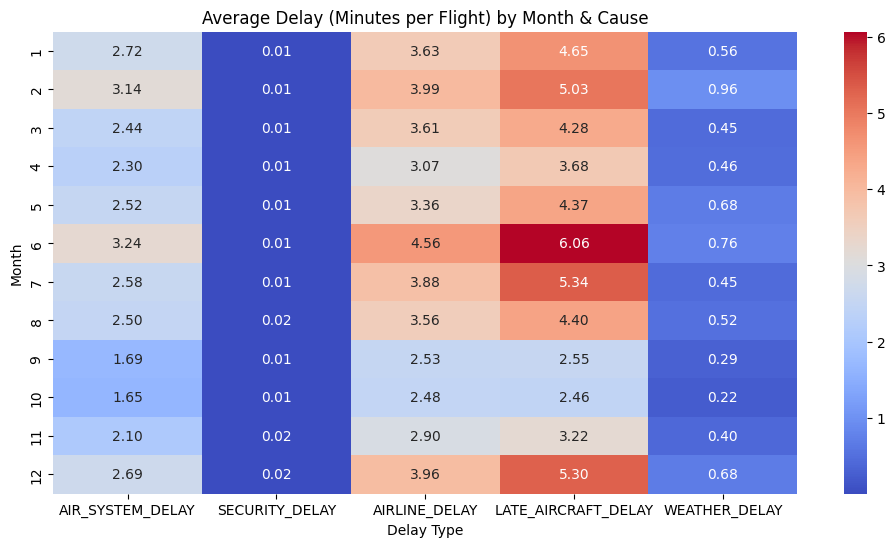

In [21]:
plt.figure(figsize=(12,6))

sns.heatmap(avg_monthly_delay,
            cmap="coolwarm",
            annot=True,
            fmt=".2f")

plt.title("Average Delay (Minutes per Flight) by Month & Cause")
plt.ylabel("Month")
plt.xlabel("Delay Type")

plt.show()
